In [1]:
import pandas as pd
#liveStock = pd.read_csv('FAOSTAT_Livestock_Primary.csv', sep=',', index_col=0)
liveAnimals = pd.read_csv('FAOSTAT_LiveAnimals.csv', sep=',', index_col=0)
#liveStock = liveStock.loc[:,["Area","Element","Item","Year","Unit","Value"]]
liveAnimals = liveAnimals.loc[:,["Area","Item","Year","Unit","Value"]]
#islands = liveStock.loc[liveStock["Area"] == 'Chile']
#value_liveStock = liveStock["Area"].drop_duplicates()
value_liveAnimals = liveAnimals["Area"].drop_duplicates()
#display(islands)
display(liveAnimals)
#print(value_liveStock)
print(value_liveAnimals)

C:\Users\mrcxp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Area,Item,Year,Unit,Value
Domain Code,,,,,
QA,Afghanistan,Asses,1961,Head,1300000.0
QA,Afghanistan,Asses,1962,Head,851850.0
QA,Afghanistan,Asses,1963,Head,1001112.0
QA,Afghanistan,Asses,1964,Head,1150000.0
QA,Afghanistan,Asses,1965,Head,1300000.0
...,...,...,...,...,...
QA,Zimbabwe,Turkeys,2014,1000 Head,28.0
QA,Zimbabwe,Turkeys,2015,1000 Head,28.0
QA,Zimbabwe,Turkeys,2016,1000 Head,29.0


Domain Code
QA       Afghanistan
QA           Albania
QA           Algeria
QA    American Samoa
QA            Angola
           ...      
QA    Western Sahara
QA             Yemen
QA      Yugoslav SFR
QA            Zambia
QA          Zimbabwe
Name: Area, Length: 227, dtype: object


In [2]:
import collections, numpy as np

our_animals = ['Chickens', 'Cattle', 'Goats', 'Sheep', 'Buffaloes', 'Pigs']

live = liveAnimals["Area"]
display(live)
liveAnimals = liveAnimals.loc[liveAnimals["Item"].isin(our_animals)]

nans = liveAnimals["Value"].isna().values
display(nans)
nan_countries = []
for i in range(len(liveAnimals)):
    if nans[i]:
        nan_countries.append(live[i])
countries_dict = collections.Counter(nan_countries)

countries = [[k,v] for k,v in countries_dict.most_common()]

display(countries)

#cacu_data.replace({i : {np.nan: cacu_data[i].mean()}})

Domain Code
QA    Afghanistan
QA    Afghanistan
QA    Afghanistan
QA    Afghanistan
QA    Afghanistan
         ...     
QA       Zimbabwe
QA       Zimbabwe
QA       Zimbabwe
QA       Zimbabwe
QA       Zimbabwe
Name: Area, Length: 105032, dtype: object

array([False, False, False, ..., False, False, False])

[['Grenada', 119],
 ['American Samoa', 116],
 ['Hungary', 59],
 ['Liechtenstein', 57],
 ['Iran (Islamic Republic of)', 55],
 ['China, mainland', 49],
 ['Egypt', 41],
 ['China, Taiwan Province of', 39],
 ['Guatemala', 31],
 ['Czechia', 30],
 ['Barbados', 29],
 ["Lao People's Democratic Republic", 29],
 ['Cyprus', 26],
 ['Ghana', 26],
 ['Kuwait', 26],
 ['Fiji', 20],
 ['Angola', 16],
 ['Greenland', 13],
 ['Greece', 8],
 ['Central African Republic', 6],
 ['Finland', 6],
 ['Chad', 2],
 ['Gabon', 2]]

In [3]:
#LiveAnimals
mil = liveAnimals.loc[liveAnimals["Unit"] == "1000 Head"]
una = liveAnimals.loc[liveAnimals["Unit"] != "1000 Head"]
mil["Value"]= mil["Value"].mul(1000)
mil["Unit"] = "Head"
Animals = pd.concat([mil,una])
Animals = Animals.loc[Animals["Year"] >= 1998]
#display(Animals)
Animal_labels = Animals["Item"].drop_duplicates().values
years = sorted(Animals["Year"].drop_duplicates().values)
country = Animals["Area"].drop_duplicates().values
print("###################################################")
print(Animal_labels,sorted(years),country)
print("###################################################")

###################################################
['Chickens' 'Cattle' 'Goats' 'Sheep' 'Buffaloes' 'Pigs'] [1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018] ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'China, Hong Kong SAR'
 'China, Macao SAR' 'China, mainland' 'China, Taiwan Province of'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Côte d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"


C:\Users\mrcxp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\mrcxp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [4]:
n_years = len(years)
n_animals = len(our_animals)

n_total = n_years*n_animals
print(n_total)

p10 = n_total*10/100

print(p10)

del_country = []

for i in countries:
    if i[1] > p10:
        del_country.append(i[0])
display(del_country)

liveAnimals = liveAnimals.loc[~liveAnimals["Area"].isin(del_country)]
display(liveAnimals)

126
12.6


['Grenada',
 'American Samoa',
 'Hungary',
 'Liechtenstein',
 'Iran (Islamic Republic of)',
 'China, mainland',
 'Egypt',
 'China, Taiwan Province of',
 'Guatemala',
 'Czechia',
 'Barbados',
 "Lao People's Democratic Republic",
 'Cyprus',
 'Ghana',
 'Kuwait',
 'Fiji',
 'Angola',
 'Greenland']

,Area,Item,Year,Unit,Value
Domain Code,,,,,
QA,Afghanistan,Cattle,1961,Head,2900000.0
QA,Afghanistan,Cattle,1962,Head,3200000.0
QA,Afghanistan,Cattle,1963,Head,3300000.0
QA,Afghanistan,Cattle,1964,Head,3350000.0
QA,Afghanistan,Cattle,1965,Head,3400000.0
...,...,...,...,...,...
QA,Zimbabwe,Sheep,2014,Head,312733.0
QA,Zimbabwe,Sheep,2015,Head,456627.0
QA,Zimbabwe,Sheep,2016,Head,504305.0


In [5]:
#Animals = Animals.loc[Animals["Area"] == "Afghanistan"]
#display(Animals["Item"].value_counts())

#display(Animals["Year"].value_counts())
#print(len(Animal_labels), len(country), len(years), len(years)*len(country), len(Animal_labels)*len(country)*len(years))

temp = Animals["Area"].value_counts()
#display(temp)

def eliminar_Sesgo(dataset, column):
    vals = dataset[column].value_counts().values
    indexs = dataset[column].value_counts().index
    val_max = dataset[column].value_counts().max()
    real_list = list()
    for i in range(len(vals)):
        if vals[i] >= val_max/2:
            real_list.append(indexs[i])
    
    new_data = pd.DataFrame()
    for i in range(len(real_list)):
        print(real_list[i])
        new_data = pd.concat([new_data,dataset.loc[dataset[column] == real_list[i]]])
                
    return new_data

def value_Total(dataset,col1, col2, labels1 = [], labels2 = []):
    value = "Value"
    df_list = list()
    for item1 in labels1:
        temp_list = list()
        for item2 in labels2:
            temp_list.append([item2, dataset.loc[(dataset[col1] == item1) & (dataset[col2] == item2)][value].sum()])
        df_list.append([item1, temp_list])
        
    return df_list
        
new_data = value_Total(Animals, "Item", "Year", Animal_labels, years)
print(new_data[3])
#display(new_data.loc[new_data["Area"] == "United States of America"])

['Sheep', [[1998, 1172186444.0], [1999, 1189075550.0], [2000, 1197473408.0], [2001, 1174408785.0], [2002, 1166830477.0], [2003, 1179128382.0], [2004, 1217176410.0], [2005, 1256595978.0], [2006, 1260618235.0], [2007, 1266893302.0], [2008, 1249078169.0], [2009, 1245239199.0], [2010, 1244369448.0], [2011, 1264568995.0], [2012, 1279543181.0], [2013, 1310762624.0], [2014, 1305056796.0], [2015, 1341519496.0], [2016, 1359349036.0], [2017, 1363464025.0], [2018, 1373546174.0]]]


[['Chickens', [[1998, 16262089000.0], [1999, 17065330000.0], [2000, 18014437000.0], [2001, 18723769000.0], [2002, 20217806000.0], [2003, 20159307000.0], [2004, 20956780000.0], [2005, 21668240000.0], [2006, 22044060000.0], [2007, 23012073000.0], [2008, 24000053000.0], [2009, 24942994000.0], [2010, 25547358000.0], [2011, 24661269000.0], [2012, 25406327000.0], [2013, 25788761000.0], [2014, 25751446000.0], [2015, 26361801000.0], [2016, 28138989000.0], [2017, 28514517000.0], [2018, 29079694000.0]]], ['Cattle', [[1998, 1412693121.0], [1999, 1418446693.0], [2000, 1424549759.0], [2001, 1421927200.0], [2002, 1428529928.0], [2003, 1439226399.0], [2004, 1452482572.0], [2005, 1465399210.0], [2006, 1479334177.0], [2007, 1484981707.0], [2008, 1498367017.0], [2009, 1480589523.0], [2010, 1480624021.0], [2011, 1481815740.0], [2012, 1491532136.0], [2013, 1495100835.0], [2014, 1502946514.0], [2015, 1512280741.0], [2016, 1531938404.0], [2017, 1535274136.0], [2018, 1553162432.0]]], ['Goats', [[1998, 856121

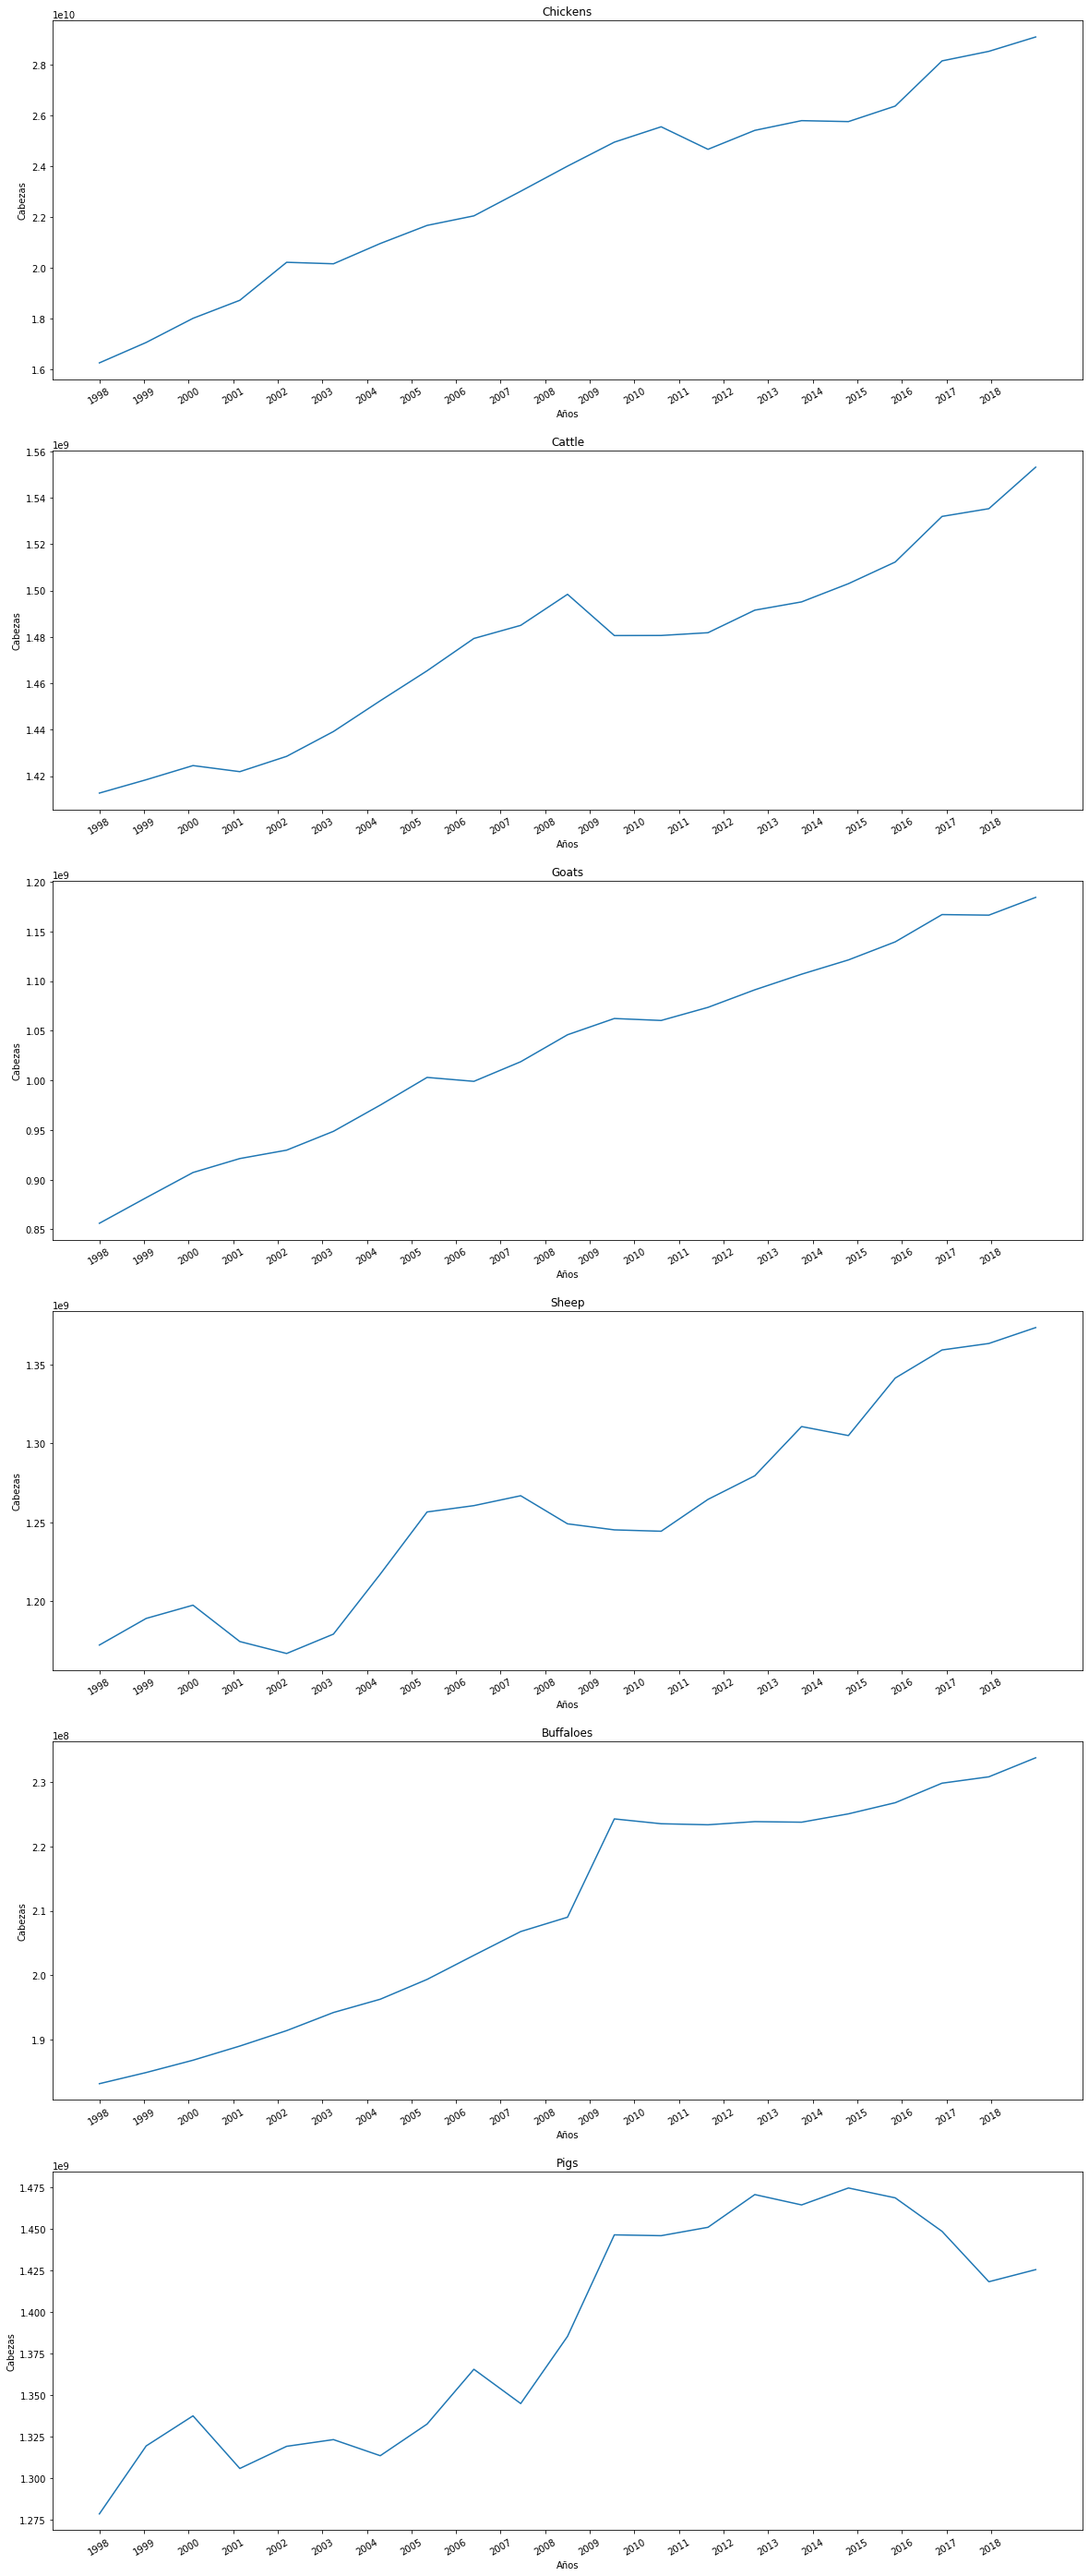

In [6]:
import matplotlib.pyplot as plt
import numpy as np

our_animals = ['Chickens', 'Cattle', 'Goats', 'Sheep', 'Buffaloes', 'Pigs']

our_values = []

for i in new_data:
    for an in our_animals:
        if(i[0] == an):
            our_values.append(i)
print(our_values)

n_años = len(years)
n_animales = len(Animal_labels)

x_edge = np.linspace(0, n_años, n_años)

fig, ax = plt.subplots(n_animales, figsize=(20,50))
#plt.xticks(x, fecha, rotation='vertical')
#plt.setp(ax, xticklabels=fecha, rotation='vertical')
for i in range(n_animales):
    suma_heads = []
    for x in range(n_años):
        suma_heads.append(new_data[i][1][x][1])
    #print(suma_heads)
    suma_heads = np.array(suma_heads)
    #print(suma_heads.shape)
    ax[i].set_title(Animal_labels[i])
    ax[i].set_xlabel("Años")
    ax[i].set_ylabel("Cabezas")
    ax[i].set_xticks(np.arange(n_años))
    ax[i].set_xticklabels(years, rotation=30)
    ax[i].plot(x_edge, suma_heads, '-')
#ax.set_xticklabels(nombres_comunas)
#ax.fill_between(x, promedio - dstd, promedio + dstd, alpha=1)
#ax.plot(x, promedio, 'o', color='tab:brown')

In [7]:
#display(liveAnimals)

#print(country, del_country)

country = [x for x in country if x not in del_country]
#print(country)

#data = liveAnimals.set_index(["Year"])
#print(data)

data = pd.DataFrame()

#print(len(our_values)) #6

for especie in range(len(our_values)):
    temp = []
    for i in range(n_años):
        temp.append(our_values[especie][1][i][1])
    #print(temp)
    data = pd.concat([data, pd.DataFrame(temp, columns=[str(our_values[especie][0]) + "[Heads]"])], axis=1)
print(data.set_index(np.array(years).T))
data = data.set_index(np.array(years).T)
#print(our_values[0])
#liveAnimals.loc[(liveAnimal["Area"] == name) & (liveAnimal[] == )]



      Chickens[Heads]  Cattle[Heads]  Goats[Heads]  Sheep[Heads]  \
1998     1.626209e+10   1.412693e+09  8.561212e+08  1.172186e+09   
1999     1.706533e+10   1.418447e+09  8.819086e+08  1.189076e+09   
2000     1.801444e+10   1.424550e+09  9.072522e+08  1.197473e+09   
2001     1.872377e+10   1.421927e+09  9.213028e+08  1.174409e+09   
2002     2.021781e+10   1.428530e+09  9.297619e+08  1.166830e+09   
2003     2.015931e+10   1.439226e+09  9.487161e+08  1.179128e+09   
2004     2.095678e+10   1.452483e+09  9.751360e+08  1.217176e+09   
2005     2.166824e+10   1.465399e+09  1.003008e+09  1.256596e+09   
2006     2.204406e+10   1.479334e+09  9.990491e+08  1.260618e+09   
2007     2.301207e+10   1.484982e+09  1.018802e+09  1.266893e+09   
2008     2.400005e+10   1.498367e+09  1.045958e+09  1.249078e+09   
2009     2.494299e+10   1.480590e+09  1.062329e+09  1.245239e+09   
2010     2.554736e+10   1.480624e+09  1.060347e+09  1.244369e+09   
2011     2.466127e+10   1.481816e+09  1.073541e+

In [9]:
data.to_csv('animals.csv', index=True)